<a href="https://colab.research.google.com/github/JumpNShootMan/RNN_MachineLearning/blob/main/RNN_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Librerías a usar:** 

keras.layers : Capas de keras (SimpleRNN : Celda recurrente)

keras.model : Crear el modelo 

keras.optimizers : Optimizador (SGD : Gradiente descendiente)

keras.utils y keras backend : Formato de entrada y salida del modelo





In [ ]:
import numpy as np
np.random.seed(5)

from keras.layers import Input, Dense, SimpleRNN
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import to_categorical
from keras import backend as K
 


## **Carga del dataset**

* Para el dataset usamos un archivo de texto que contienen 1536 nombres de dinosaurios


* Usamos la función open de python y luego convertir cada carácter en minúscula 

In [ ]:
nombres = open('nombres_dinosaurios.txt','r').read()
nombres = nombres.lower()

* Creamos un diccionario con los carácteres del alfabeto
* En total son 26 letras del alfabeto pero incluimos /n que vendria a ser el salto de linea

In [ ]:
alfabeto = list(set(nombres))
tam_datos, tam_alfabeto = len(nombres), len(alfabeto)
print("En total hay %d carácteres, y el diccionario tiene un tamaño de %d carácteres." % (tam_datos, tam_alfabeto))


En total hay 19909 carácteres, y el diccionario tiene un tamaño de 27 carácteres.


* Convertimos los carácteres a indices del 0 al 26 , luego la inversa para cuando la red haya entrenado y sacar los nombres de los dinosaurios generados.  

In [ ]:
car_a_ind = { car:ind for ind,car in enumerate(sorted(alfabeto))}
ind_a_car = { ind:car for ind,car in enumerate(sorted(alfabeto))}

print(car_a_ind)




{'\n': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}


## **Modelo :** 

* Entrada : El alfabeto con las 27 letras  
* Para el modelo de RNN utilizaremos 25 capas ocultas 
* Generaremos dos salidas : La predicción y^t(x)  y el estado anterior a^tx

![](https://i.gyazo.com/a17fa4299542de4fbe97e036c616172f.png)

Se incluye la celda recurrente y luego la capa de salida 

En la ultima linea se observa como sera el modelo 

Este empieza con el carácter actual (entrada)  y el estado anterior a0 

In [ ]:
n_a = 25    
entrada  = Input(shape=(None,tam_alfabeto))

a0 = Input(shape=(n_a,))

celda_recurrente = SimpleRNN(n_a, activation='tanh', return_state = True)


capa_salida = Dense(tam_alfabeto, activation='softmax')

salida = []
hs, _ = celda_recurrente(entrada, initial_state=a0)
salida.append(capa_salida(hs))
modelo = Model([entrada,a0],salida)




# **Optimizador :**

Para el optimizador usamos el gradiente descendiente y lo utilizamos porque el RNN tiene una limitación y es que en un punto del aprendizaje si sale un coeficiente alto o bajo el proceso de aprendizaje se veria afectado.

En la siguiente figura , mostramos un ejemplo de como se comporta la RNN sin optimizador.

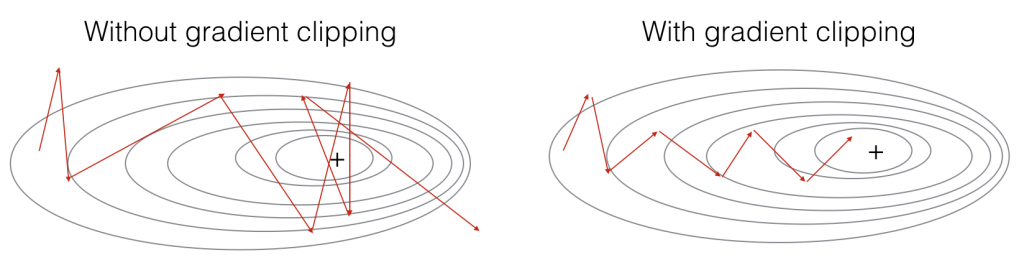)

In [ ]:
opt = SGD(lr=0.0005)
modelo.compile(optimizer=opt, loss='categorical_crossentropy')

# **Pruebas de entrenamiento**

* Para el entrenamiento generamos una lista de nombres de cada dinosaurio y se mezclan aleatoriamente.

* En la funcion train_generator() , se toma cada ejemplo de entrenamiento y generar 3 vectores que son las entradas del modelo.
 * Entrada X
 * Salida  Y
 * Activación inicial 



In [ ]:
with open("nombres_dinosaurios.txt") as f:
    ejemplos = f.readlines()
ejemplos = [x.lower().strip() for x in ejemplos]
np.random.shuffle(ejemplos)

# Crear ejemplos de entrenamiento usando un generador
def train_generator():
    while True:
       
        ejemplo = ejemplos[np.random.randint(0,len(ejemplos))]
        #print(ejemplo)

        # Convertir el ejemplo a representación numérica
        X = [None] + [car_a_ind[c] for c in ejemplo]

        #print(X)

        # Crear "Y", resultado de desplazar "X" un caracter a la derecha
        Y = X[1:] + [car_a_ind['\n']]

        #print(Y)

        # Convertir "X" "Y" al formato one-hot
        x = np.zeros((len(X),1,tam_alfabeto))

        onehot = to_categorical(X[1:],tam_alfabeto).reshape(len(X)-1,1,tam_alfabeto)

        x[1:,:,:] = onehot

        y = to_categorical(Y,tam_alfabeto).reshape(len(X),tam_alfabeto)

        # Activación inicial (matriz de ceros) a0
        a = np.zeros((len(X), n_a))

        yield [x, a], y





##  **Ejemplo**

In [ ]:

ejemp = modelo.fit_generator(train_generator(), steps_per_epoch=1, epochs=1, verbose=0)
print(ejemp)


dystylosaurus
[None, 4, 25, 19, 20, 25, 12, 15, 19, 1, 21, 18, 21, 19]
[4, 25, 19, 20, 25, 12, 15, 19, 1, 21, 18, 21, 19, 0]
parasaurolophus
[None, 16, 1, 18, 1, 19, 1, 21, 18, 15, 12, 15, 16, 8, 21, 19]
[16, 1, 18, 1, 19, 1, 21, 18, 15, 12, 15, 16, 8, 21, 19, 0]


#**Entrenamiento**
Para el entrenamiento usaremos 10000 iteraciones en las cuales cada una tendrá 80 ejemplos de entrenamiento como batch_size.

Valores de los hiperparámetros:

Ejemplos para el entrenamiento

BATCH_SIZE = 80

Número de iteraciones 

NITS = 10000


In [ ]:

BATCH_SIZE = 120			
NITS = 10000		

for j in range(NITS):
    historia = modelo.fit_generator(train_generator(), steps_per_epoch=BATCH_SIZE, epochs=1, verbose=0)

    # Imprimir evolución del entrenamiento cada 1000 iteraciones
    if j%1000 == 0:
        print('\nIteración: %d, Error: %f' % (j, historia.history['loss'][0]) + '\n')





Iteración: 0, Error: 2.203336


Iteración: 1000, Error: 2.215102


Iteración: 2000, Error: 2.180313


Iteración: 3000, Error: 2.154800


Iteración: 4000, Error: 2.200834


Iteración: 5000, Error: 2.203491


Iteración: 6000, Error: 2.132097


Iteración: 7000, Error: 2.151176


Iteración: 8000, Error: 2.099288


Iteración: 9000, Error: 2.181229



#**Generación de nombres**

Para la generación de series de nombres de dinosaurios , vamos a inicializar la entrada x y el estado iniciar a0 con ceros.

En la siguiente imagen podemos observar como la predicción   de la RNN entrenada:


1-Comenzamos por los vectores inicializados en 0, luego pasa por la celda recurrente y la capa de activación softmax. 

La predicción tendra un vector de 27 elementos que es una distribución de probabilidad para elegir el carácter que tenga el mayor porcentaje.

2- Ahora terminado la primera iteración, se convertirá en la entrada a la celda en el siguiente instante de tiempo y así sucesivamente.

Para la aplicación, se decidió que cuando haya un salto de línea en el alfabeto o el nombre sea un carácter mayor a 50. Pase a generar un nuevo nombre.

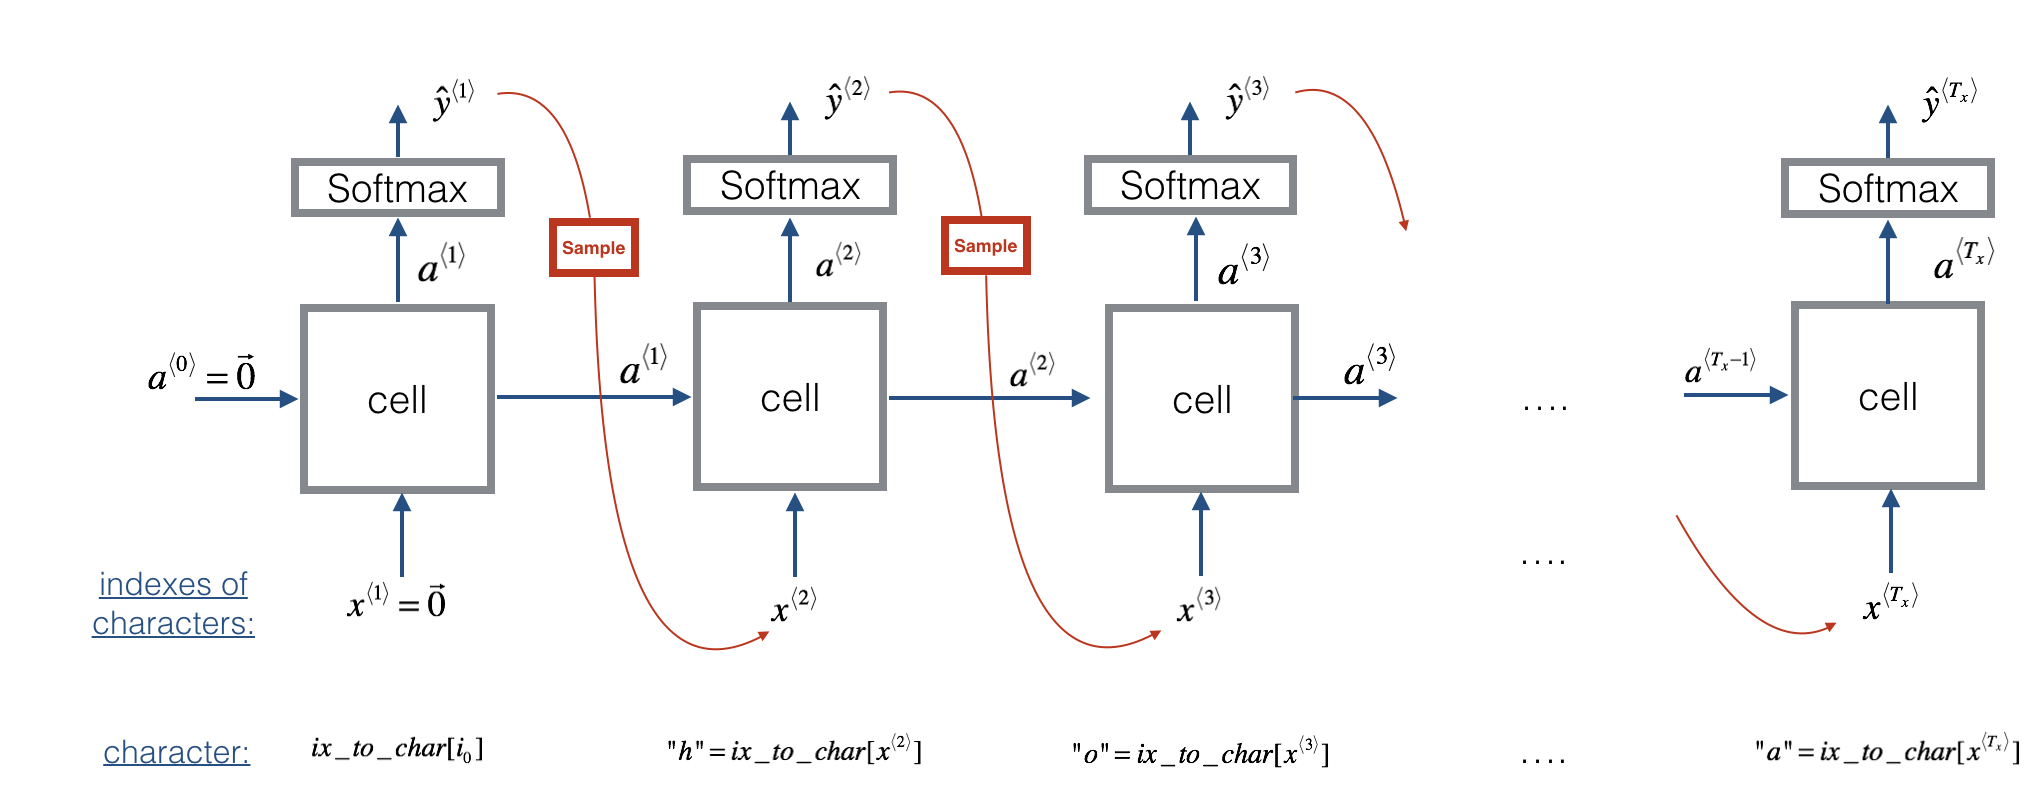




In [ ]:
def generar_nombre(modelo,car_a_num,tam_alfabeto,n_a):

    x = np.zeros((1,1,tam_alfabeto,))
    a = np.zeros((1, n_a))

    nombre_generado = ''
    fin_linea = '\n'
    car = -1

    # Iterar sobre el modelo y generar predicción hasta tanto no se alcance
    # "fin_linea" o el nombre generado llegue a los 50 caracteres
    contador = 0
    while (car != fin_linea and contador != 50):
          # Generar predicción usando la celda RNN
          a, _ = celda_recurrente(K.constant(x), initial_state=K.constant(a))
          y = capa_salida(a)
          prediccion = K.eval(y)

          # Escoger aleatoriamente un elemento de la predicción, el que tenga la probabilidad mas alta
          ix = np.random.choice(list(range(tam_alfabeto)),p=prediccion.ravel())

          # Convertir el elemento seleccionado a caracter y añadirlo al nombre generado
          car = ind_a_car[ix]
          nombre_generado += car

          # Crear x_(t+1) = y_t, y a_t = a_(t-1) : siguiente estado 
          x = to_categorical(ix,tam_alfabeto).reshape(1,1,tam_alfabeto)
          a = K.eval(a)

          contador += 1

          if (contador == 50):
            nombre_generado += '\n'

    print(nombre_generado)



In [ ]:
# Generar 100 ejemplos de nombres generados por el modelo entrenado
for i in range(100):
    generar_nombre(modelo,car_a_ind,tam_alfabeto,n_a)

zngprusolusausalunisjmodtongerotqpankrporutoscnano

codortorabonvenngrusyd

cliusplrominomurrureleporypondosauromonnonsaurylon

russ

atatronlosanosarurasanispvosanonorursanovernorurop

jis

uoycopanatorno

auritornggoviraurolmyx

osconpr

inosanoaryraururaradintorurosalorugosknginiimravur

pruroneoprnonashonpsaururrcheonononnotamanonldosau

reptorusogophoverusabogppanymalapedrzrorurrasatone

ptopmornoscoruntryusayosamoonosaururobowesayaonis


ionachos

aytorustdrauryvelovenyrunbosas

tonelycvluronnss

asaauronadomeltolagadedaurorursm

docedopystosauryraimopanlen

s

mopamnorens

pokrs

ausausimianocosacosakhyrprusasovotrtorauronn

hemaurpentpnitosategasapirotenfnptrcodegonn

tore

lilecenyrons

anu

sapaderadegiospltapesosas

x

x

hons

cerupspstauaromocadrosanotrmurrussanosrylolooprnde

nwosnnoraurosszfavrdonosaclomonanmolrunlipreruranb

ns

whusalodelborunosalodopaussmiliausasaopelbanuosano

ustaontorutosautylprguricepopasenceoluryxscotrypro

eslsonitonorayospyopnoragoprurasanodrte

#**Resultados**

Como podemos observar en los resultados anteriores la red RNN nos genero nombres muy largos y varios no se asemejaban a los nombres de dinosaurios.

* whusalodelborunosalodopaussmiliausasaopelbanuosano
* ustaontorutosautylprguricepopasenceoluryxscotrypro

Por otro lado , hubo algunos que si generaba nombres de dinosaurios.

* opstosacoruss
* omololavuss



Esto ocurre por las limitaciones de RNN, estas son que las RNN son redes neuronales de corto plazo que se limitan a mirar hacia atrás solo unos pocos pasos.

A medida que avanzaban la red iba olvidando lo que habia entrenado.



## Comparación de Modelo RNN con Modelo RNN mejorado: LSTM

In [ ]:
!pip install --upgrade keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM, SimpleRNN, Conv2D, MaxPooling2D
from tensorflow.keras.utils import normalize
import matplotlib.pyplot as plt


#Importamos el dataset mnist

mnist = tf.keras.datasets.mnist

#Datos de entrenamiento y prueba

(x_train, y_train),(x_test, y_test) = mnist.load_data()

#Proceso de normalización con la finalidad de mejorar el aprendizaje de las redes neuronales
print(x_train.shape)
print(y_train.shape)

x_train = x_train/255.0
x_test = x_test/255.0

print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)
(60000, 28, 28)
(60000,)


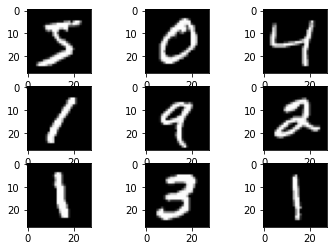

In [ ]:
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [ ]:
model1 = Sequential()
model2 = Sequential()

#Modelo RNN

model1.add(SimpleRNN(32, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True)) #Return sequences es lo que hace a una RNN lo que es...
model1.add(SimpleRNN(32))                                                                            #Se retornan estados ocultos que representan la memoria de elementos procesados pasados
model1.add(Dropout(0.2))
model1.add(Dropout(0.2))
model1.add(Dense(32,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10,activation='softmax'))

print(x_train.shape)
print(x_train.shape[1:])
model2.add(LSTM(32, input_shape=(x_train.shape[1:]), return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(32))
model2.add(Dropout(0.2))
model2.add(Dense(32,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation='softmax'))

opt = tf.keras.optimizers.Adam(lr = 1e-3, decay=1e-5)

(60000, 28, 28)
(28, 28)


In [ ]:
model1.compile(loss='sparse_categorical_crossentropy',
               optimizer=opt,
               metrics=['accuracy'])

In [ ]:
model2.compile(loss='sparse_categorical_crossentropy',
               optimizer=opt,
               metrics=['accuracy'])

In [ ]:
hist1 = model1.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Epoch 1/3
1875/1875 [==============================] - 38s 21ms/step - loss: 0.5209 - accuracy: 0.8491 - val_loss: 0.4064 - val_accuracy: 0.8754
Epoch 2/3
1875/1875 [==============================] - 38s 20ms/step - loss: 0.4841 - accuracy: 0.8612 - val_loss: 0.3786 - val_accuracy: 0.8843
Epoch 3/3
1875/1875 [==============================] - 38s 20ms/step - loss: 0.4558 - accuracy: 0.8675 - val_loss: 0.3582 - val_accuracy: 0.8906


In [ ]:
hist2 = model2.fit(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Epoch 1/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.6177 - accuracy: 0.8027 - val_loss: 0.2198 - val_accuracy: 0.9367
Epoch 2/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2632 - accuracy: 0.9312 - val_loss: 0.1424 - val_accuracy: 0.9585
Epoch 3/3
1875/1875 [==============================] - 34s 18ms/step - loss: 0.1917 - accuracy: 0.9504 - val_loss: 0.1142 - val_accuracy: 0.9661


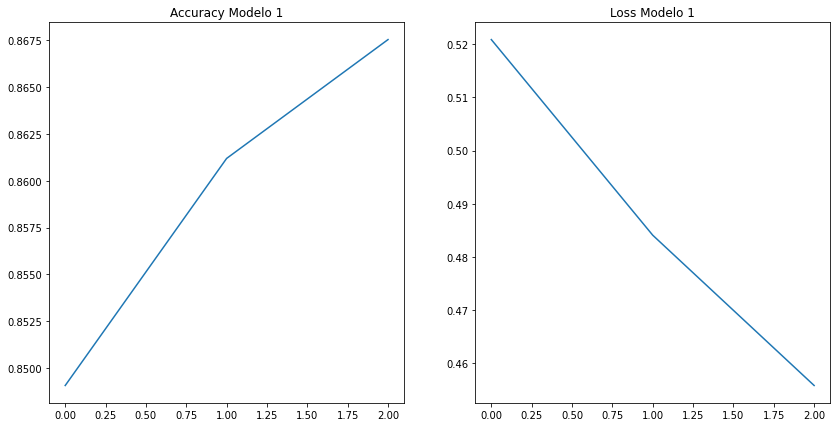

In [ ]:
plt.figure(figsize=[14,7])
ax= plt.subplot(1,2,1)
plt.plot(hist1.history['accuracy'])
plt.title('Accuracy Modelo 1')
ax= plt.subplot(1,2,2)
plt.plot(hist1.history['loss'])
plt.title('Loss Modelo 1')
plt.show()

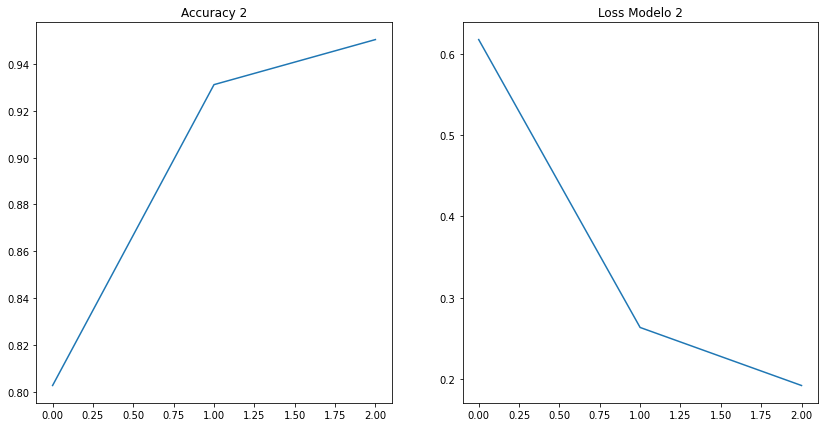

In [ ]:
plt.figure(figsize=[14,7])
ax= plt.subplot(1,2,1)
plt.plot(hist2.history['accuracy'])
plt.title('Accuracy 2')
ax= plt.subplot(1,2,2)
plt.plot(hist2.history['loss'])
plt.title('Loss Modelo 2')
plt.show()

Modelo Nº | Loss | Accuracy
--- | --- | ---
1 | 0.4558 | 0.8675
2 | 0.1917 | 0.9504